In [1]:
import warnings
warnings.filterwarnings('ignore')
#Read the .h5 file
import h5py
#Build spreadSheets
import pandas as pd
#mathematical operations and array functions
import numpy as np
#Building and Using radar objecta
import pyart
#Plotting graphs
import matplotlib.pyplot as plt
#Getting computer's info
import os
#Same
import sys
#Getting the map for radar plottings
import cartopy.crs as ccrs
#Warning do not edit the utilities file 
from utilities import *


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\user\anaconda3\lib\site-packages\xarray\core\pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
C:\Users\user\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\user\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
C:\Users\user\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\user\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packa

In [2]:
def plot_graph(angle, radar, vmax =None,vmin=None,gatefilter=None,name=None,save = False):
    
    display = pyart.graph.RadarMapDisplay(radar)
    projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                       central_longitude=radar.longitude['data'][0])
    display.plot_ppi_map("total_power_horizontal",
                         resolution='10m',
                         #projection=projection,
                         lat_0=radar.latitude['data'][0],
                         lon_0=radar.longitude['data'][0],
                         min_lon=radar.longitude['data'][0]+3, max_lon=radar.longitude['data'][0]-3, min_lat=radar.latitude['data'][0]+1.3, max_lat=radar.latitude['data'][0]-1.4,
                         gatefilter=gatefilter,
                         vmax = vmax,
                         vmin = vmin
                         )
    
    #display.plot_ray("total_power_horizontal", 1) # 'red', 'dashed'), this plots a line graph for the azimuth
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])
    display.plot_range_rings([35.,60.], ls='--')

    y1 = radar.latitude['data'][0]
    x1 = radar.longitude['data'][0]
    
    angle_rad = angle*(np.pi/180)

    x2 = x1 + (2.51*np.sin(angle_rad))
    y2 = y1 + (2.51*np.cos(angle_rad))

    #display.plot_point(x2, y2)

    display.plot_line_xy([x1, x2], [y1, y2], ls='--')

    if save:
        plt.savefig(name)
    plt.show()

In [3]:
#Input single file
filename = "../data/test_files/202202041245_polar_pl_radar08b0_augzdr_lp_canonical.h5"
#filename = "../data/test_files/202201070005_polar_pl_radar08b0_augzdr_lp_canonical.h5"
radar1 = pyart.aux_io.read_odim_h5(filename)

#opens given location to open and read data
with h5py.File(filename, "r") as f:
    
    listofkeys = list(f.keys())
    print("List of Keys: %s" % listofkeys)
    #next we assume the first key will always be the dataset1 key (the others being how/what/where)
    a_group_key = listofkeys[0]
    print("Key with data channels: %s" % a_group_key)

    data = list(f[a_group_key])
    print("List of objects in " + a_group_key + ": %s" % data)
    a_group_key_1 = data[0]
    print(a_group_key_1)
    
#This code ended up only being good for confirming data structure
    

List of Keys: ['dataset1', 'how', 'what', 'where']
Key with data channels: dataset1
List of objects in dataset1: ['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'what', 'where']
data1


In [4]:
#Input file location
filename = "../data/test_files/202202041245_polar_pl_radar08b0_augzdr_lp_canonical.h5"
#filename = "../data/test_files/202201070005_polar_pl_radar08b0_augzdr_lp_canonical.h5"

#open file
f = h5py.File(filename, "r")
#get_file_summary(f)

#Obtaining the TPH data from the hdf5 file - file is of type "class 'h5py._hl.dataset.Dataset'
TPHdata = f['/dataset1/data1/data']
print(type(TPHdata))
#print(TPHdata)

#builds an array from the dataset
TPHdata_arr = TPHdata[()]
#prints any one of the 360 sets of TPH data (indexed from 0-359)
#TPHdata_arr[0]

<class 'h5py._hl.dataset.Dataset'>


In [5]:
#inputs an array of y values and a period, and outputs an array of the same size which is a moving average
#with 0s in the first w-1 spots (which would otherwise be empty)
def moving_average(x, w):
    n = w - 1
    a = [0] * n
    b = np.convolve(x, np.ones(w), 'valid') / w
    return np.concatenate((a, b))

C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\Users\user\anaconda3\lib

C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\Users\user\anaconda3\li

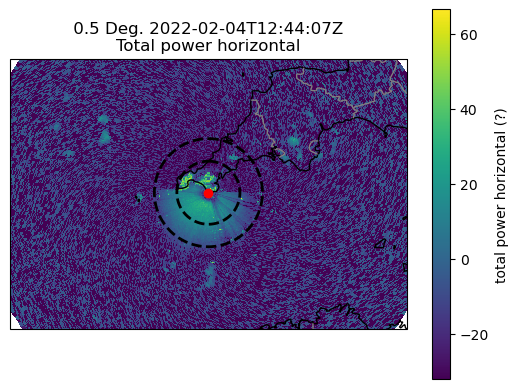

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


90


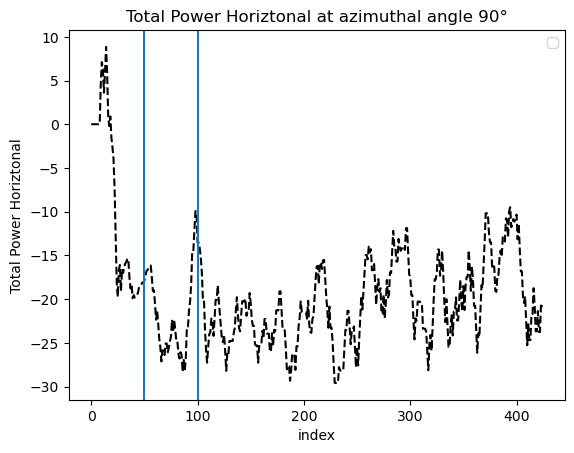

In [6]:
#anglerange = np.arange(start=80, stop=90, step=10)

#for angle in anglerange:
angle=90
 
    
plot_graph(angle=angle, radar=radar1)
print(angle)
x = np.array(range(0, 425))
y_raw = TPHdata_arr[angle]
y_rolling_av = moving_average(y_raw, 10)


#plt.plot(x, y_raw, color = "black", label = "Array elements")

plt.plot(x, y_rolling_av, color='black', linestyle='dashed')
    
    
plt.title(f"Total Power Horiztonal at azimuthal angle {angle}\N{DEGREE SIGN}")
plt.xlabel("index")
plt.ylabel("Total Power Horiztonal")
plt.axvline(x=50)
plt.axvline(x=100)

plt.legend()
plt.show()

In [7]:
def create_single_radar_file(h5filename, originalfilename, location):
    
    if h5filename["what"].attrs["object"] == b'scan': #In this case it isn't, it's already SCAN
        h5filename["what"].attrs.__setitem__("object", "SCAN")
        
    radar = pyart.aux_io.read_odim_h5(location + "/" + originalfilename)
    return radar
    dfile.close()

In [8]:
radarobject = create_single_radar_file(f, "202202041245_polar_pl_radar08b0_augzdr_lp_canonical.h5", "../data/test_files")

In [9]:
gatefilter_lp = pyart.correct.GateFilter(radarobject)
gatefilter_lp.exclude_outside('normalized_coherent_power',0.2,0.8)
gatefilter_lp.exclude_inside('cross_correlation_ratio', 0.7,1.2)

C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
C:\Users\user\anaconda3\lib\site-packages\cartopy\crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,
C:\Users\user\anaconda3\l

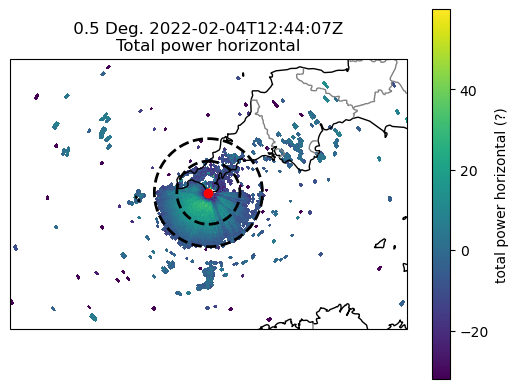

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


90


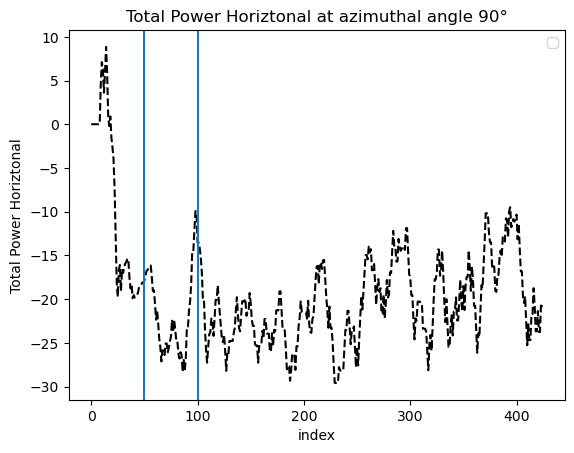

In [10]:
#anglerange = np.arange(start=80, stop=90, step=10)

#for angle in anglerange:
angle=90
 
    
plot_graph(angle=angle, radar=radar1, gatefilter=gatefilter_lp)
print(angle)
x = np.array(range(0, 425))
y_raw = TPHdata_arr[angle]
y_rolling_av = moving_average(y_raw, 10)


#plt.plot(x, y_raw, color = "black", label = "Array elements")

plt.plot(x, y_rolling_av, color='black', linestyle='dashed')
    
    
plt.title(f"Total Power Horiztonal at azimuthal angle {angle}\N{DEGREE SIGN}")
plt.xlabel("index")
plt.ylabel("Total Power Horiztonal")
plt.axvline(x=50)
plt.axvline(x=100)

plt.legend()
plt.show()

In [11]:
rayrange = np.arange(start=90, stop=270, step=1)

Total = 0
counter = 0

for ray in rayrange: 

    mask = gatefilter_lp.gate_excluded[ray]

    consecutive_true_count = 0
    for i, value in enumerate(mask):
        if value:
            consecutive_true_count += 1
            if consecutive_true_count == 21:
                EndOfBackscatter = i-consecutive_true_count+1
                #print(f"%s consecutive True values start at index {i-consecutive_true_count+1}" % consecutive_true_count)
                break
        else:
            consecutive_true_count = 0

    #print(f"This Ray's Backscatter ends after Bin {EndOfBackscatter}")

    BackscatterRadius = EndOfBackscatter*0.6

    #print(f"each bin is 0.6km in length and therefore this index corresponds to a distance of %s" % BackscatterRadius + "m")
    #print(f"Backscatter Radius azimuthal angle {ray}\N{DEGREE SIGN} (clockwise from North) %s" % BackscatterRadius + "m")
    counter = counter + 1
    Total = Total + BackscatterRadius

    
Average = Total/counter
print(f"Average Backscatter Radius of Plot = %s " % Average)

Average Backscatter Radius of Plot = 57.36 


In [12]:
def select_files_angle(route, angle):
    fileDir = os.listdir(route)
    #gives a list of the files present at route
    radarList = []
    #defining an empty radar list to populate
    for file in fileDir:
        #This for loop cycles through all the files in fileDir and makes a temporary variable dfile assigned to the current file in question in the cycle
        dfile =  h5py.File(route + "/" + file , 'r')
        try:
            #the temporary dfile is then 'tried'.
            if dfile["what"].attrs["object"] == b'scan':
                dfile["what"].attrs.__setitem__("object", "SCAN")
            #I believe this for loop changes what>object to SCAN from b'scan' - if ever what>object is in fact b'scan', I don't know
            if dfile["dataset1"]["where"].attrs["elangle"] == angle:
                radar = pyart.aux_io.read_odim_h5(route +"/"+file)
            #if the elangle under dataset1 is less than/equal to the chosen angle create the radar file, and add it to radarList
                radarList.append(radar)
            dfile.close()
        except:
            dfile.close()
    return radarList

In [13]:
select_files_angle("../data/test_files", angle = 0.5)

In [14]:
    
    rayrange = np.arange(start=90, stop=270, step=1)

    Total = 0
    counter = 0

    for ray in rayrange: 

        mask = gatefilter_lp.gate_excluded[ray]

        consecutive_true_count = 0
        for i, value in enumerate(mask):
            if value:
                consecutive_true_count += 1
                if consecutive_true_count == 21:
                    EndOfBackscatter = i-consecutive_true_count+1
                    #print(f"%s consecutive True values start at index {i-consecutive_true_count+1}" % consecutive_true_count)
                    break
            else:
                consecutive_true_count = 0

        #print(f"This Ray's Backscatter ends after Bin {EndOfBackscatter}")

        BackscatterRadius = EndOfBackscatter*0.6

        #print(f"each bin is 0.6km in length and therefore this index corresponds to a distance of %s" % BackscatterRadius + "m")
        #print(f"Backscatter Radius azimuthal angle {ray}\N{DEGREE SIGN} (clockwise from North) %s" % BackscatterRadius + "m")
        counter = counter + 1
        Total = Total + BackscatterRadius


    Average = Total/counter
    print(f"Average Backscatter Radius of Plot = %s " % Average)

Average Backscatter Radius of Plot = 57.36 


In [15]:
def select_files_angle(route, angle):
    fileDir = os.listdir(route)
    #gives a list of the files present at route
    radarList = []
    #defining an empty radar list to populate
    for file in fileDir:
        #This for loop cycles through all the files in fileDir and makes a temporary variable dfile assigned to the current file in question in the cycle
        dfile =  h5py.File(route + "/" + file , 'r')
        try:
            #the temporary dfile is then 'tried'.
            if dfile["what"].attrs["object"] == b'scan':
                dfile["what"].attrs.__setitem__("object", "SCAN")
            #I believe this for loop changes what>object to SCAN from b'scan' - if ever what>object is in fact b'scan', I don't know
            if dfile["dataset1"]["where"].attrs["elangle"] == angle:
                radar = pyart.aux_io.read_odim_h5(route +"/"+file)
            #if the elangle under dataset1 is less than/equal to the chosen angle create the radar file, and add it to radarList
                radarList.append(radar)
            dfile.close()
        except:
            dfile.close()
    return radarList

In [16]:
def build_readings_df(route):
    df = pd.DataFrame(columns = ["File Name", "Date", "Hour", "Angle", "Pulse"])
    df["File Name"] = [route + "/"+  file for file in os.listdir(route)]
    df["Date"] = df["File Name"].apply(lambda x : int(x.split("/")[-1].split("_")[0][:8]))
    df["Hour"] = df["File Name"].apply(lambda x : int(x.split("/")[-1].split("_")[0][8:]))
    df["Pulse"] = df["File Name"].apply(lambda x : x.split("_")[6])
    df["Angle"] = df["File Name"].apply(lambda x : get_angle(x))
    return df

In [17]:
build_readings_df("../data/all_data")

,File Name,Date,Hour,Angle,Pulse
0,../data/all_data/202201060000_polar_pl_radar08...,20220106,0,NaN,sp
1,../data/all_data/202201060000_polar_pl_radar08...,20220106,0,NaN,sp
2,../data/all_data/202201060001_polar_pl_radar08...,20220106,1,NaN,sp
3,../data/all_data/202201060001_polar_pl_radar08...,20220106,1,NaN,sp
4,../data/all_data/202201060001_polar_pl_radar08...,20220106,1,NaN,sp
...,...,...,...,...,...
29522,../data/all_data/202210212356_polar_pl_radar08...,20221021,2356,NaN,lp
29523,../data/all_data/202210212357_polar_pl_radar08...,20221021,2357,NaN,lp
29524,../data/all_data/202210212357_polar_pl_radar08...,20221021,2357,NaN,lp
29525,../data/all_data/202210212358_polar_pl_radar08...,20221021,2358,NaN,lp


In [18]:
df = build_readings_df("../data/all_data")
df.to_csv("radar_df.csv")

In [19]:
#To select a subset of the data table we use this:
#You can edit the values of the columns to change the selected data
selected_data = df.loc[(df["Pulse"]== "lp")&  (df["Angle"]== 0.5)] # & ((df["Date"]== 20220106) | (df["Date"]== 20220106))]

In [20]:
selected_data

,File Name,Date,Hour,Angle,Pulse


In [21]:
def get_radar_list(df, date=None, hour=None, angle=None, pulse=None):
    
    if date is not None:
        df = df.loc[df['Date'] == date]
    if hour is not None:
        df = df.loc[df['Hour'] == hour]
    if angle is not None:
        df = df.loc[df['Angle'] == angle]
    if pulse is not None:
        df = df.loc[df['Pulse'] == pulse]
    listRadars = []
    for route in df["File Name"].values:
        h5 = h5py.File(route, 'r')
        originalfilename = route[19:]
        location = route[:18]
        listRadars.append(create_single_radar_file(h5, originalfilename, location))
    return listRadars

In [22]:
get_radar_list(selected_data, date=20220106)

[]